<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/practica1/Pr%C3%A1ctica_1_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow - Hola mundo!


**La base de datos**

In [ ]:
from IPython.display import IFrame
url = "https://www.kaggle.com/datasets/salil007/caavo"
IFrame(url, width=800, height=600)

## Preparación de TensorFlow

Importamos TensorFlow al programa:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


Importamos la librería opendatasets para descargar conjuntos de datos de Kaggle.

In [ ]:
!pip install opendatasets
import opendatasets as od

## Carga de un conjunto de datos

[Clothes Classification](https://www.kaggle.com/datasets/salil007/caavo)

In [ ]:
dataset = "https://www.kaggle.com/datasets/salil007/caavo"
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wjsl13
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salil007/caavo


100%|██████████| 618M/618M [00:17<00:00, 36.5MB/s]


Configuración de la data

In [ ]:
import os
os.chdir("/content/caavo")
os.listdir("/content/caavo")

['train', 'samp_sub.csv', 'test']

In [ ]:
import cv2
import os
import numpy as np

def procesar_imagenes(folder_path, target_size=(224, 224)):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    imagenes_procesadas = []

    for filename in image_files:
        img_path = os.path.join(folder_path, filename)

        img = cv2.imread(img_path)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img = cv2.resize(img, target_size)

        imagenes_procesadas.append(img)

    return np.array(imagenes_procesadas)

folder_path = '/content/caavo/train/train/'

imagenes_procesadas = procesar_imagenes(folder_path)

print(f"Se procesaron {imagenes_procesadas.shape[0]} imágenes con tamaño {imagenes_procesadas.shape[1:]} cada una.")


Se procesaron 62258 imágenes con tamaño (224, 224) cada una.


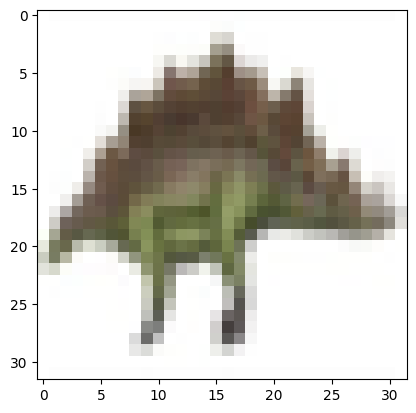

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[1], cmap="gray")

## Creación de un modelo de aprendizaje automático

Cree un modelo `tf.keras.Sequential`:

In [ ]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(32, 32,3)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(100)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) es útil para apilar capas donde cada una tiene un [tensor](https://www.tensorflow.org/guide/tensor) de entrada y uno de salida. Las capas son funciones con una estructura matemática desconocida que se puede reutilizar y que tiene variables entrenables. La mayoría de los modelos TensorFlow están compuestos por capas. Este modelo usa las capas [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) y [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Para cada ejemplo, el modelo devuelve un vector de [logits](https://developers.google.com/machine-learning/glossary#logits) o puntajes de [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) (registro de probabilidades) por cada clase.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.18478662,  0.16266268,  0.15657592,  1.3735139 ,  0.48021877,
        -0.41910285, -0.59568036,  0.50237054,  0.20089337,  0.69678557,
         1.032598  , -0.62536263,  0.13896737,  0.47836155, -0.9402652 ,
        -0.0514926 , -1.1528369 , -0.5863404 ,  0.27686107,  0.4155635 ,
        -0.70588505, -0.11056677,  0.30232334,  0.71741086, -1.1478113 ,
        -0.5842693 , -0.9835627 , -0.5640001 , -0.28173906, -0.7107874 ,
        -0.12204459, -0.41069835,  0.39589465, -1.9365305 , -0.24432781,
         0.36065966,  1.2570717 , -1.2818315 ,  0.5169447 , -0.9592601 ,
        -0.30764246,  0.5784672 ,  0.12360495, -0.3634019 , -0.67253244,
        -0.22579384,  0.47982514, -0.12007391,  0.3308771 , -0.094229  ,
        -0.41482484,  0.7490312 , -0.2756874 ,  0.03961388,  1.2256699 ,
        -0.312816  ,  0.74362457, -0.2804219 ,  0.32960644,  1.032596  ,
         0.06312904,  0.02149136,  0.6638867 , -0.4484217 ,  1.4431188 ,
        -0.23446865, -0.07666175, -1.1603504 , -0.2

La función `tf.nn.softmax` convierte estas funciones logits en *probabilidades* para cada clase:

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.00668673, 0.00946475, 0.00940732, 0.03176693, 0.01300236,
        0.00528995, 0.00443369, 0.0132936 , 0.0098336 , 0.0161464 ,
        0.02259006, 0.00430402, 0.00924312, 0.01297823, 0.00314133,
        0.00764017, 0.00253977, 0.00447529, 0.01060975, 0.01218828,
        0.00397103, 0.0072019 , 0.01088336, 0.01648289, 0.00255257,
        0.00448457, 0.00300822, 0.0045764 , 0.00606887, 0.00395161,
        0.00711971, 0.0053346 , 0.0119509 , 0.00115996, 0.00630022,
        0.01153714, 0.02827516, 0.00223241, 0.01348876, 0.00308222,
        0.00591369, 0.01434468, 0.00910221, 0.00559297, 0.00410571,
        0.00641807, 0.01299724, 0.00713376, 0.0111986 , 0.00732053,
        0.00531263, 0.01701241, 0.00610571, 0.00836893, 0.02740106,
        0.00588317, 0.01692068, 0.00607687, 0.01118438, 0.02259001,
        0.00856806, 0.00821863, 0.01562385, 0.00513711, 0.03405683,
        0.00636264, 0.00745027, 0.00252076, 0.00641704, 0.01350346,
        0.01380336, 0.01249537, 0.01222094, 0.00

Nota: es posible aplicar la función `tf.nn.softmax` en la función de activación para la última capa de la red. Si bien esto puede hacer que la salida del modelo se interprete más directamente, este enfoque no se recomienda ya que es imposible proporcionar un cálculo de pérdida numéricamente estable y exacto para todos los modelos con salida softmax.

Defina la función de pérdida para el entrenamiento con `losses.SparseCategoricalCrossentropy`:

[Cross entropía binaria](https://www.v7labs.com/blog/cross-entropy-loss-guide)

In [ ]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

La función de pérdida toma un vector de valores verdaderos de base y un vector de logits y devuelve una pérdida escalar para cada ejemplo. Esta pérdida es igual a la probabilidad de registro negativa de la clase verdadera: La pérdida es cero si el modelo está seguro de la clase correcta.

El modelo sin entrenar arroja probabilidades cercanas al lo aleatorio (1/10 para cada clase), entonces, la pérdida inicial debería estar cerca de `-tf.math.log(1/10) ~= 2.3`.

La entrópia cruzada para un modelo no entrenado `Pérdida=−log(y)`

In [ ]:
y_train[y_train[:1]]

array([[[71]]])

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

4.40728

Antes de empezar el entrenamiento, configure y compile el modelo con Keras `Model.compile`. Configure la clase del [`optimizador`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como `adam`, establezca `loss` para la función `loss_fn` que definió antes y especifique una métrica a evaluar para el modelo, mediante la determinación del parámetro `metrics` para `accuracy`.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,),
              loss=loss_fn,
              metrics=['accuracy'])

## Entrenamiento y evaluación del modelo

Use el método `Model.fit` para ajustar los parámetros del modelo y minimizar la pérdida:

In [ ]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.0332 - loss: 4.3402
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.0321 - loss: 4.3339
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0334 - loss: 4.3343
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0325 - loss: 4.3323
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0325 - loss: 4.3376
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0322 - loss: 4.3287
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.0337 - loss: 4.3209
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.0354 - loss: 4.3159
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0345 - loss: 4.3138
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.0365 - loss: 4.2997
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.0369 - loss: 4.3025
Epoch 12/15
1563/15

El método `Model.evaluate` controla el desempeño del modelo, por lo general con un [conjunto de evaluación](https://developers.google.com/machine-learning/glossary#validation-set) o un [conjunto de prueba](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.0606 - loss: 4.1392


[4.139200687408447, 0.060600001364946365]

El clasificador de imágenes ahora está entrenado para proporcionar ~98% de exactitud en este conjunto de datos. Para más información, lea los [tutoriales de TensorFlow](https://www.tensorflow.org/tutorials/).

Si desea que su modelo devuelva una probabilidad, puede empaquetar el modelo entrenado y adjuntarle el softmax:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[1.04825020e-04, 9.13500693e-03, 3.78441229e-03, 3.00522265e-03,
        4.29385900e-03, 9.51342285e-03, 1.25326391e-03, 1.51599103e-04,
        1.40807936e-02, 3.52860405e-03, 4.60137799e-03, 5.79677895e-03,
        3.13310474e-02, 2.18052454e-02, 3.62323626e-04, 1.13904728e-02,
        3.29902745e-03, 1.75018897e-04, 1.07719889e-03, 1.03971893e-02,
        8.06189841e-04, 7.25376792e-03, 7.19553232e-03, 3.83492969e-02,
        2.96295948e-05, 9.58812702e-03, 2.11571506e-03, 5.41584566e-03,
        5.07400697e-03, 6.28682273e-03, 4.61662225e-02, 5.29566256e-04,
        1.90755986e-02, 1.27424952e-02, 1.54481549e-03, 5.27547952e-03,
        3.43630370e-03, 1.99799184e-02, 3.84032167e-03, 1.90653410e-02,
        9.60110407e-03, 1.47291878e-03, 2.58413726e-03, 5.50128461e-04,
        2.57688598e-03, 2.17277929e-03, 1.11692473e-02, 8.44174938e-04,
        8.70533288e-03, 4.22615819e-02, 2.92757596e-03, 4.18201089e-03,
        8.3629

## Conclusión

¡Felicitaciones! Ha entrenado un modelo de entrenamiento automático con un conjunto de datos predeterminado usando la API [Keras](https://www.tensorflow.org/guide/keras/overview).

Para acceder a más ejemplos sobre el uso de Keras, consulte los [tutoriales](https://www.tensorflow.org/tutorials/keras/). Para más información sobre cómo crear modelos con Keras, lea las [guías](https://www.tensorflow.org/guide/keras). Si quiere aprender más sobre cómo cargar y preparar los datos, mire los tutoriales sobre [carga de datos de imágenes](https://www.tensorflow.org/tutorials/load_data/images) o [carga de datos CSV](https://www.tensorflow.org/tutorials/load_data/csv).
